<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [31]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



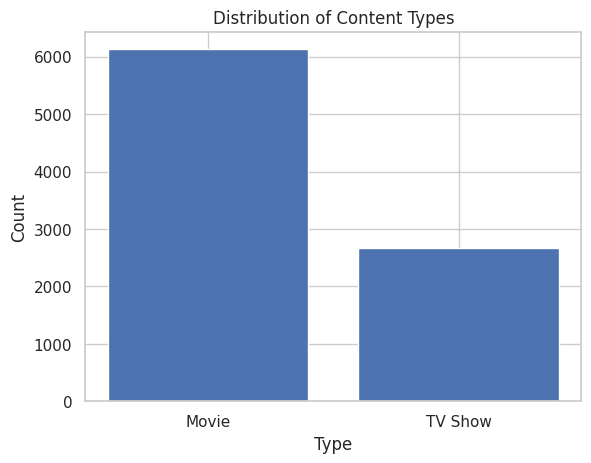

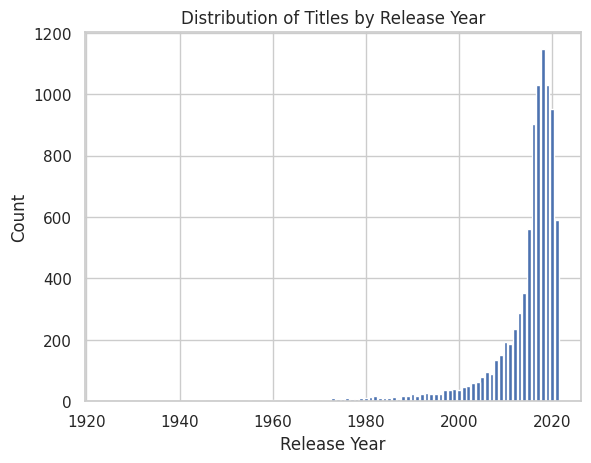

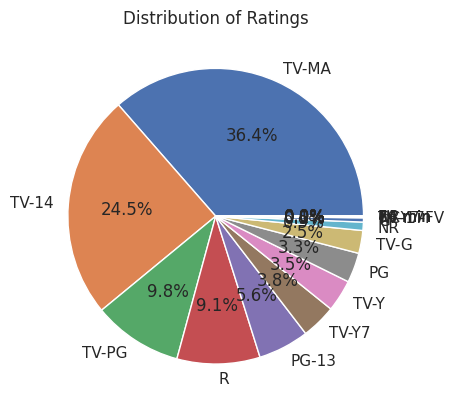

In [32]:
# FIXME
type_counts = df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()
#El tipo de contenido predominante es peliculas
release_year_counts = df['release_year'].value_counts()
plt.bar(release_year_counts.index, release_year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Titles by Release Year')
plt.show()
#No se si responder reciente, pero en el año aproximadamente 2019 hay mas que este año o 2024
#pero mas que en 2000
rating_counts = df['rating'].value_counts()
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()
#TV-MA es mas comun, es decir, netflix esta mas enfocado hacia un publico mas "adulto",
#es decir, mas de 18 años




## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


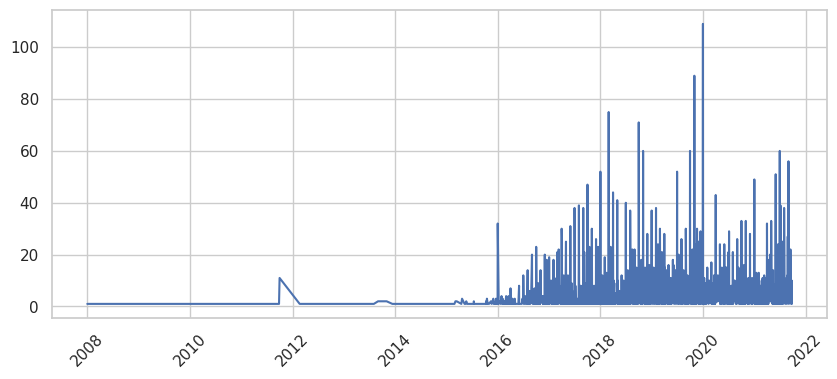

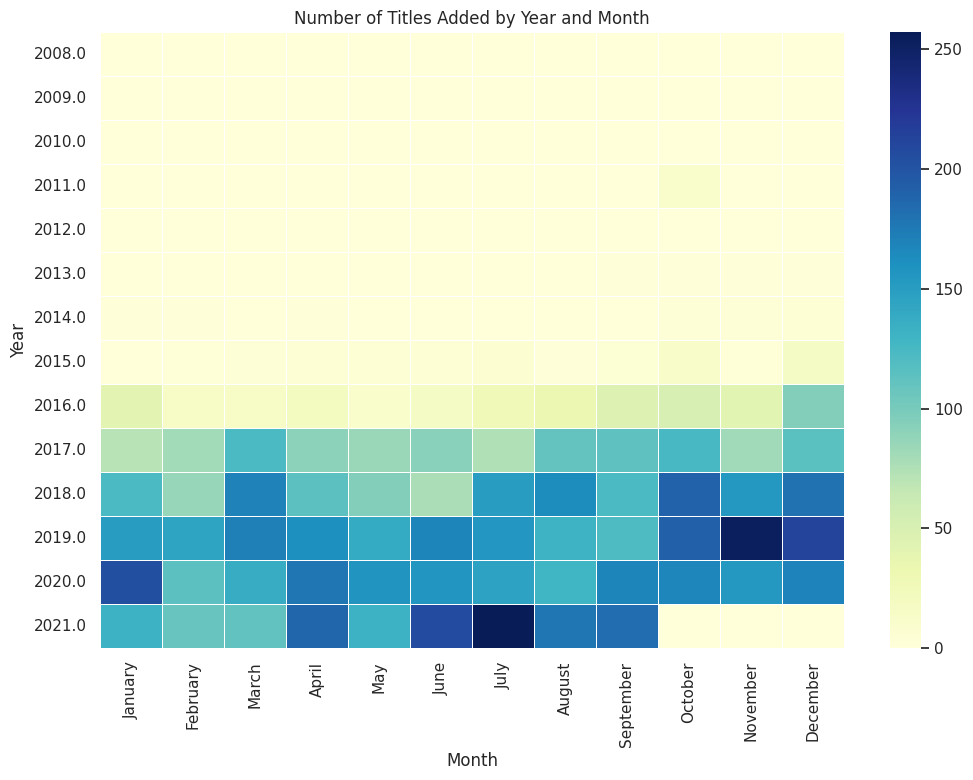

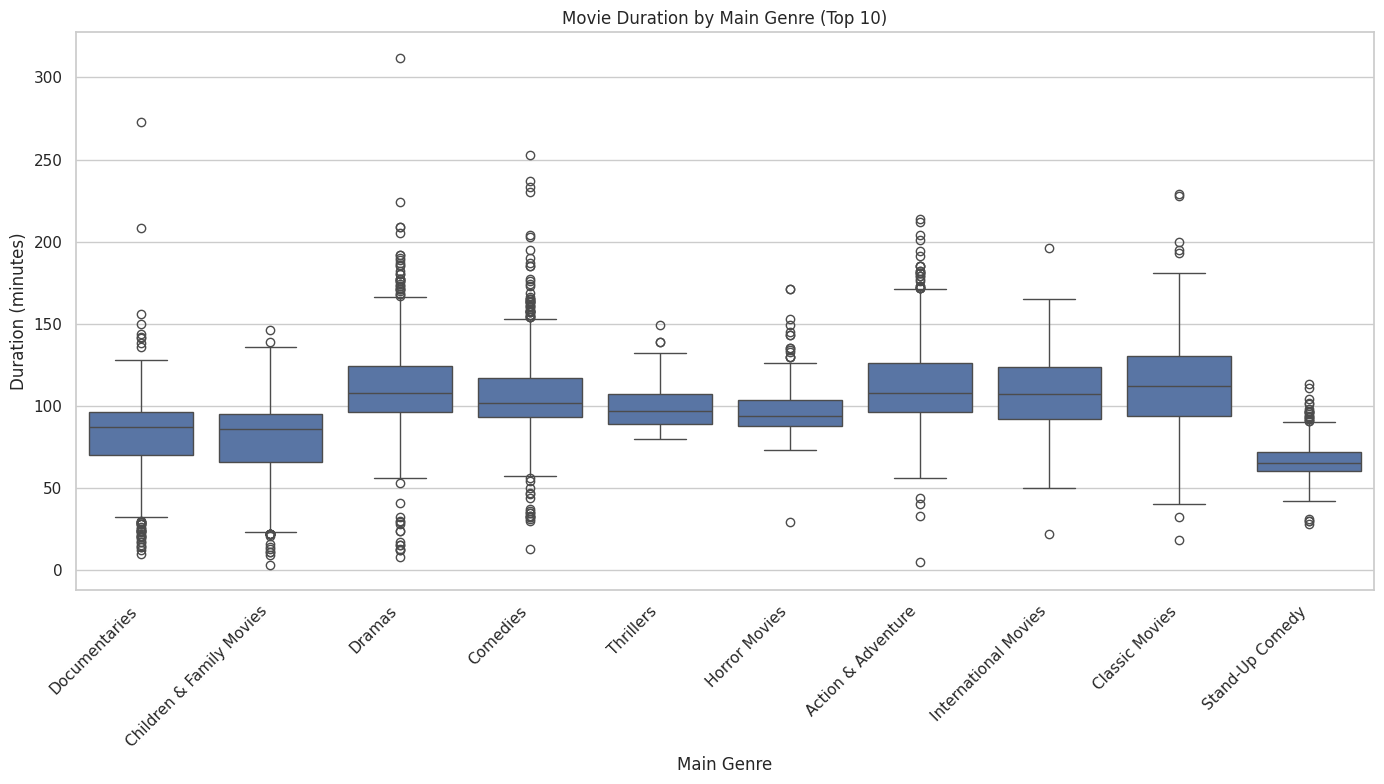

In [33]:
# FIXME
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
counts = df['date_added'].dt.date.value_counts().sort_index()  # ahora cronológico
plt.figure(figsize=(10,4))
plt.plot(counts.index, counts.values)
plt.xticks(rotation=45)
plt.show()
#mediante y alrededor del año 2020
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

monthly_counts = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

# Ensure all months are present for consistent ordering
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts[months_order]

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_counts, cmap='YlGnBu', linewidths=.5)
plt.title('Number of Titles Added by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()
#Se concentra entre julio a diciembre, pero mas en julio y noviembre (en octubre noviembre
#y diciembre, los datos no estaban para 2021)
# Filter for movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract duration in minutes
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Since a movie can have multiple genres listed, we'll consider the first listed genre for simplicity
movies_df['main_genre'] = movies_df['listed_in'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else None)

# Get the top N genres for better visualization (optional, but can help with clarity)
top_genres = movies_df['main_genre'].value_counts().nlargest(10).index
movies_df_top_genres = movies_df[movies_df['main_genre'].isin(top_genres)]

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=movies_df_top_genres, x='main_genre', y='duration_minutes')
plt.xticks(rotation=45, ha='right')
plt.title('Movie Duration by Main Genre (Top 10)')
plt.xlabel('Main Genre')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()
#Las que durna mas son de accion, peliculas internacionales, dramas y peliculas clasicas
#Luego la longitud de cajas y extension de "bigotes" indican la variablilidad.
#generos como dramas y peliculas internacionales muestran mayor variabilidad en duracion





## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



/tmp/ipython-input-2768806090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


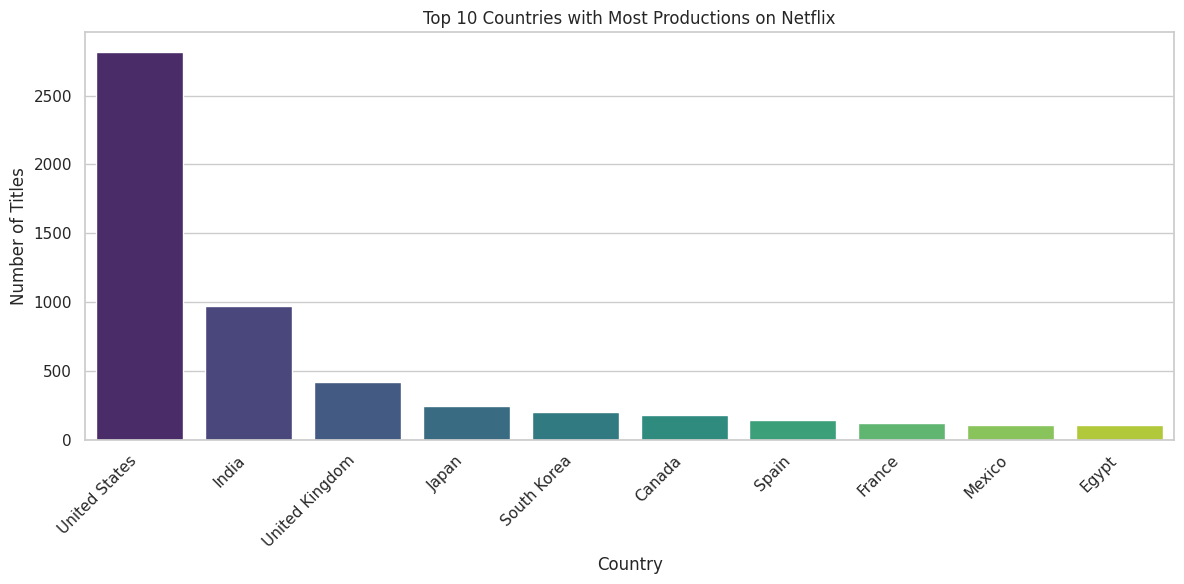

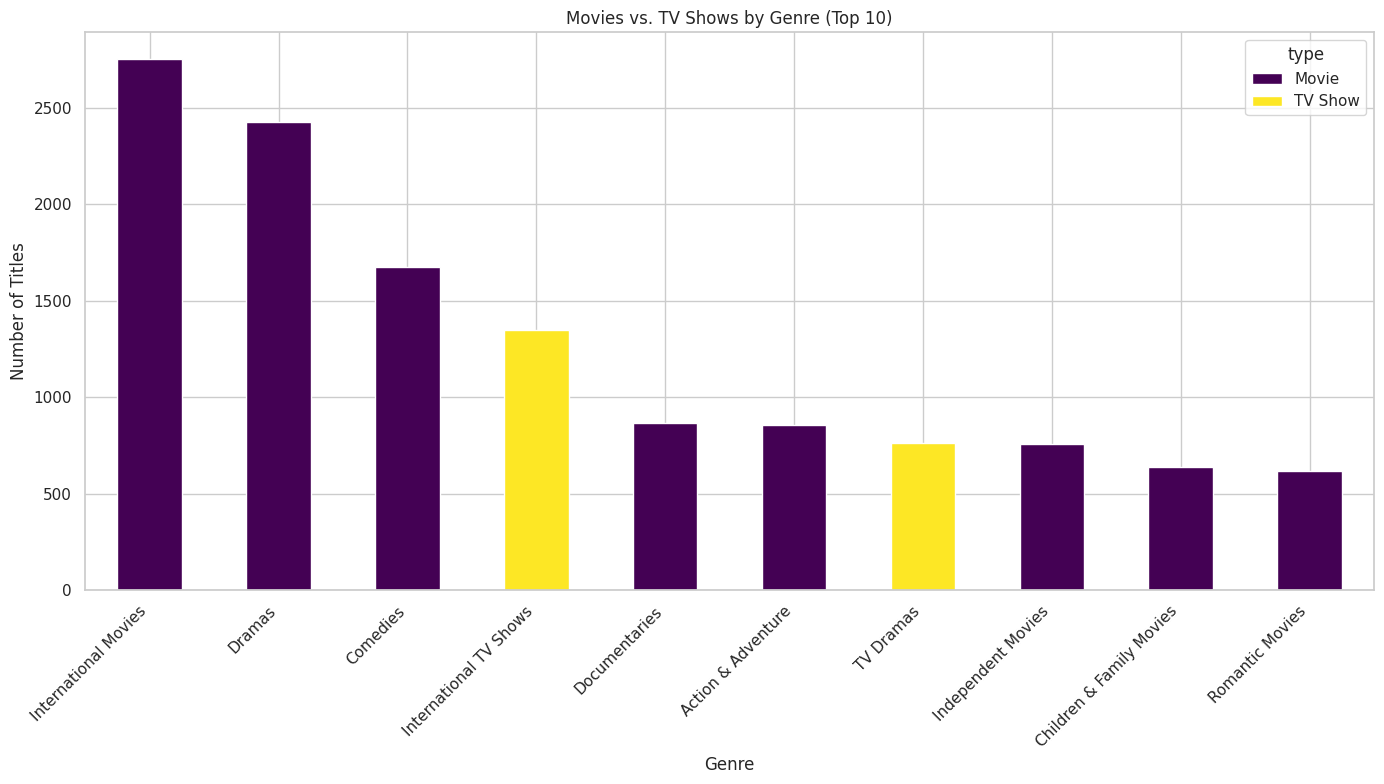

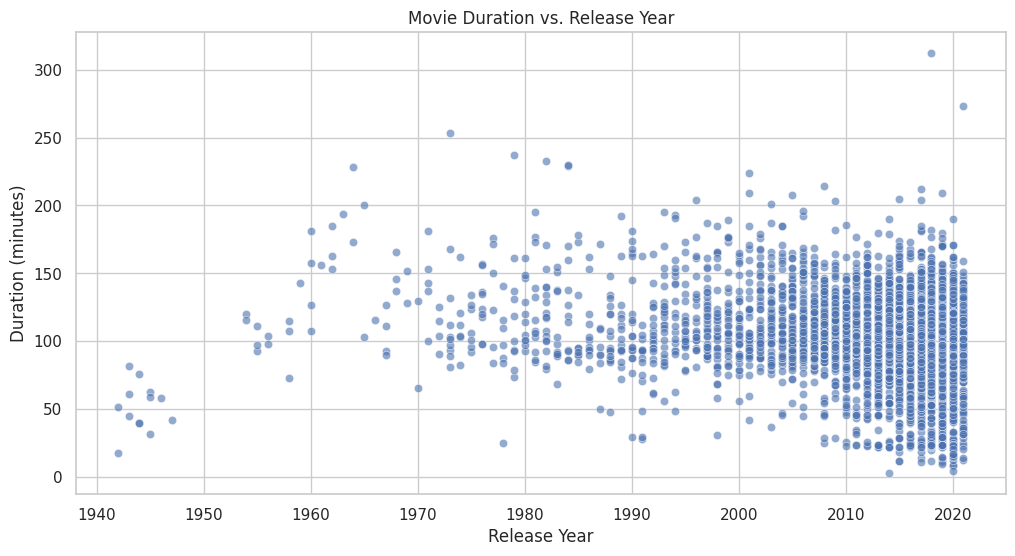

In [34]:
#FIXME
#7
country_counts = df['country'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries with Most Productions on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()
#Estados unidos e India, y la verdad es esperada jajaja

# 8. Películas vs Series según género
# expandimos el dataframe para manjear mejor los titulos
genres_df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

genre_type_counts = genres_df.groupby(['listed_in', 'type']).size().unstack(fill_value=0)

top_genres = genre_type_counts.sum(axis=1).nlargest(10).index
genre_type_counts_top = genre_type_counts.loc[top_genres]

genre_type_counts_top.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Movies vs. TV Shows by Genre (Top 10)')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#Estan mas relacionados a peliculas que a tv shows, pero hay otros que predominan los tv shows.
#como se muestra en el grafico.

# 9. Relación entre duración y año de lanzamiento (solo películas)
# teniamos movies_df como "duration_minutes" desde 6

plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_df, x='release_year', y='duration_minutes', alpha=0.6)
plt.title('Movie Duration vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()
#Por supuesto han cambiado, en 1940, 1950, duraban aprox 80 minutos, en cambio ahora,
#son como de casi 2 horas
#y si se ven outliners interesantes, algunos con 300 min

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME

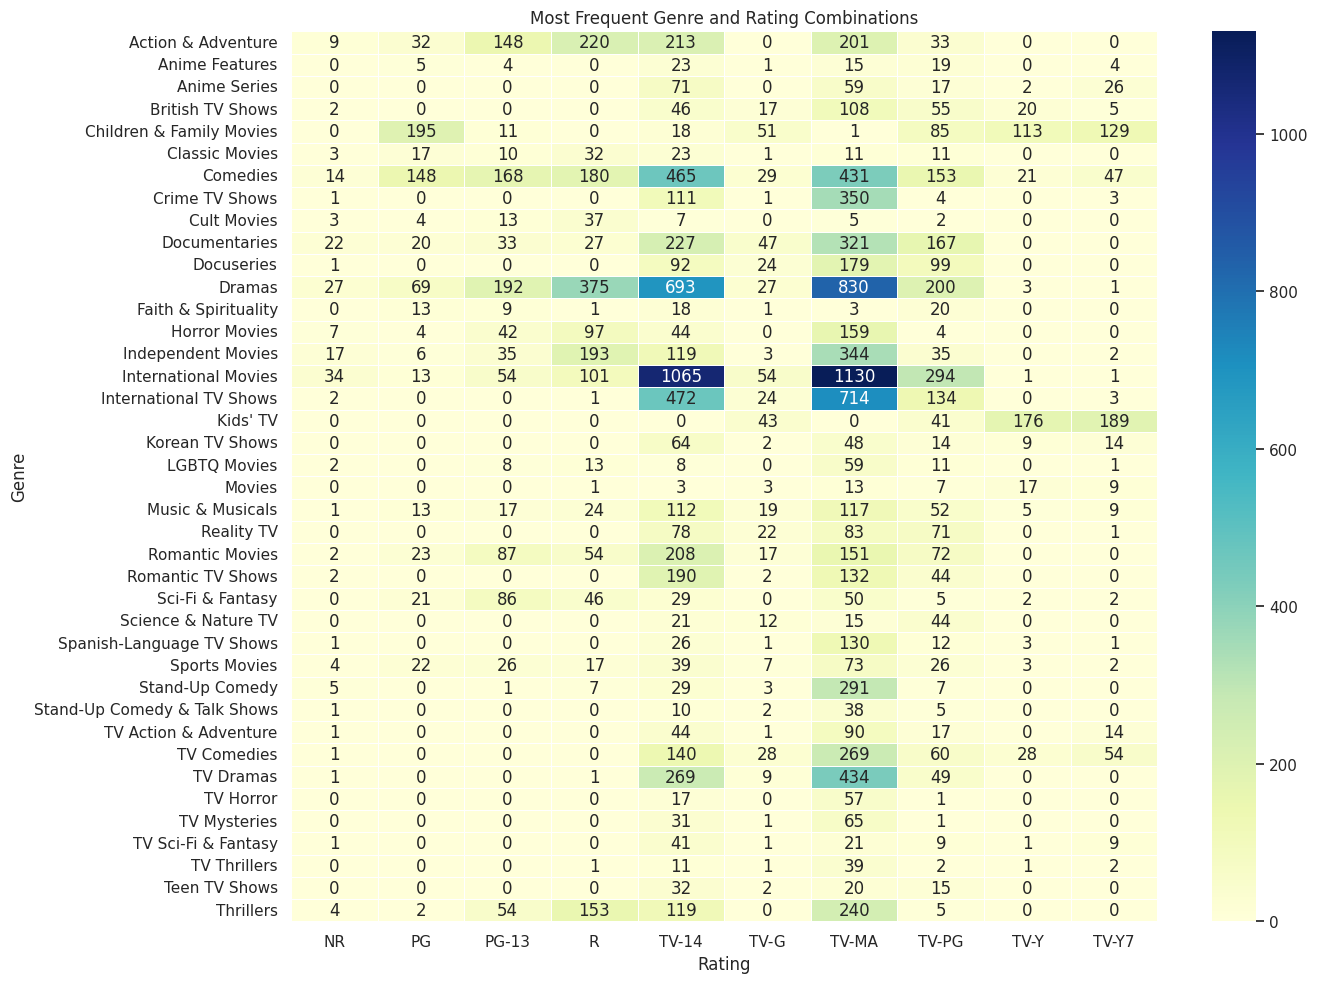

In [35]:
# Desafío Final: Combinaciones más frecuentes de género + rating
# Expand the dataframe to handle multiple genres
genre_rating_df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Group by genre and rating and count the combinations
genre_rating_counts = genre_rating_df.groupby(['listed_in', 'rating']).size().unstack(fill_value=0)

# Get the top genres and ratings for a cleaner heatmap (optional)
# Let's consider genres with at least a certain number of titles and ratings that are frequent
min_genre_count = 50
min_rating_count = 100

frequent_genres = genre_rating_counts.sum(axis=1)[genre_rating_counts.sum(axis=1) >= min_genre_count].index
frequent_ratings = genre_rating_counts.sum(axis=0)[genre_rating_counts.sum(axis=0) >= min_rating_count].index

genre_rating_counts_filtered = genre_rating_counts.loc[frequent_genres, frequent_ratings]

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(genre_rating_counts_filtered, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Most Frequent Genre and Rating Combinations')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#uno nota que international movies esta para un publico mas adulto.
#y el de publico mas familiar que es el TV-G es children and family movies
#Claramente como lo dice el nombre